# Analiza i predvidjanje kvaliteta vazduha u Novom Sadu
**Autor**: *Nikola Selić IN-43-2017*

## Motivacija
Srbija, konkretno Beograd, je bio medju prvima, a kasnije i prvi, na listi zagadjenosti vezduha na svetu https://www.airvisual.com/world-air-quality-ranking. Podatak jeste zabrinjavajuć i, samim tim, glavna motivacija ovog rada je jedan od načina kako se može reagovati na tu pojavu. Agregirajući zvanične podatke o kvalitetu vazduha kao i vrste štetnih gasova u našoj atmosferi bi za cilj trebalo da informiše šire javne mase o opasnosti i štetnosti koje ti gasovi izazivaju.
(https://i.redd.it/g7c4hmz73vu31.jpg)

## Cilj
Glavna tema ovog projekta je predvidjanje kvaliteta vazduha u atmosferi koristeci podatke iz meteoroloskih stanica Srbije. Konkretno, koristimo podatke za Liman, Novi Sad. Obradjujemo sledeće faktore kvaliteta vazduha:
-   CO
-   SO2
-   O3
-   NO2
-   NOX
-   NO

## Hipoteza
Zato što postoji trend izmedju vremena (24 sata) i koncentracije CO i ostalih štetnih gasova, mozemo pretpostaviti buduću vrednost emisije gasova u periodu od jednog dana. 

## Algoritmi
Algoritmi koji bi se koristili u implementaciji projekta su:

#### Multivarijabilna Linearna Regresija
Multivariajilna linearna regresija se koristi kada imamo više promenljivih ili (eng. features) koje trebamo uzimati u obzir. Naša funkcija hipoteze se može napisati kao:

$ h_\theta(x) = \theta_0 + \sum\limits_{i=1}^{m} \theta_ix_i$

Odavde, možemo rešiti jednačinu pomoću algoritma opadajućeg gradijenta (eng. Gradient Descent)

#### Mutivarijabilni algoritam opadajuceg gradijenta
Multivarijabilni kriterijum optimalnosti je sličan kao i univarijabilni:

$J(\overrightarrow{\theta}) = \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2$ (nekada $\frac{1}{2m}$ zbog lepšeg izvoda)

## Alati
Za izgradnju projekta tj. analizu podataka i implementaciju regresije u svrsi saznavanja budućih vrednosti, koristi se **Python** programski jezik,ili konkretnije, **Jupyter Notebook** okruženje.

Ostali alati i biblioteke koji su korisćeni su:
- numpy
    - Koristimo za rad nad matricama
- pandas
    - Omogucava dobru organizaciju podataka i rad sa ključevima kao i ostalim obeležijama
- requests
    - Služi za slanje http zahteva koji koristimo za pozivaje API-a
- selenium
    - Koristi se za automatsko korišćenje internet pretraživaca
- BeautifulSoup
    - Omogućava čitanje html stranica i izvlačenja informacija iz iste

## Podaci
Podaci su pribavljeni sa zvaničnog sajta Ministarstva zaštite životne sredine - Agencija za zaštitu životne sredine - [http://www.amskv.sepa.gov.rs/](http://www.amskv.sepa.gov.rs/)

Podaci se moraju prvo učitati i dodati u pandas dataframe i nakon toga srediti i urediti. Količina podataka je 718 redova tj. period od mesec dana.

### Pribavljanje podataka
Agencija za zaštitu životne sredine nema API ili drugi način pribavljanja podataka u nekom formatu, tako da za regionalne podatke moramo koristiti tehniku automatskog pribavljanja podataka (eng. web scraping)

Sav kod pribavljanja i čiscenja podataka se nalazi u [data_scripting.py](https://github.com/Selich/Serbian-Airquality/blob/master/data_scraping.py)

Podaci se ažuriraju svakog sata zato što su nam potrebni podaci koji su relevantni za dati trenutak.


Pregled tabela dataset-a:

In [2]:
import pandas as pd
df = pd.read_csv("./data/amskv_data.csv")
df.head()

,Unnamed: 0,Vreme,SO2 [ug.m-3],O3 [ug.m-3],NO2 [ug.m-3],NOX [ug.m-3],CO [mg.m-3],NO [ug.m-3],V [m/s],dd [°],P [mb],t [°C]
0,1,2019-10-12 17:00:00,20.78,48.59,21.68,28.16,0.34,4.16,0.42,115.59,1015.67,22.81
1,2,2019-10-12 18:00:00,14.82,35.95,23.31,29.73,0.36,4.22,0.91,131.52,1015.93,19.13
2,3,2019-10-12 19:00:00,12.47,40.89,18.90,25.31,0.33,4.15,0.95,131.06,1016.32,17.23
3,4,2019-10-12 20:00:00,12.04,44.82,14.80,22.19,0.28,4.78,0.99,137.33,1016.57,16.24
4,5,2019-10-12 21:00:00,12.45,55.13,11.64,17.97,0.25,4.14,0.86,136.70,1016.87,15.72


## Korisni prikazi podataka
Neki prikazi podataka koji mogu bolje da objasne odnos podataka.

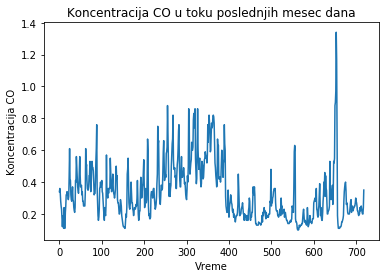

In [4]:
df = df[df['CO [mg.m-3]'] < 4]
plt.title("Koncentracija CO u toku poslednjih mesec dana")
plt.xlabel("Vreme")
plt.ylabel("Koncentracija CO")
plt.plot(df["CO [mg.m-3]"])

Mozemo i uočiti konkretna kretanja u roku od 24h.

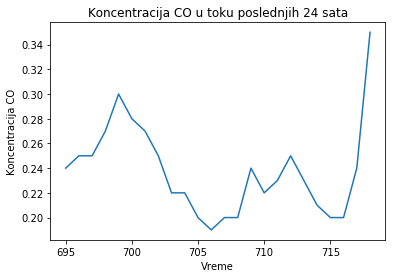

In [5]:
plt.title("Koncentracija CO u toku poslednjih 24 sata")
plt.xlabel("Vreme")
plt.ylabel("Koncentracija CO")
plt.plot(df["CO [mg.m-3]"].tail(24))

Možemo i videti kretanja ostalih štetnih gasova u toku poslednjih 24 sata.

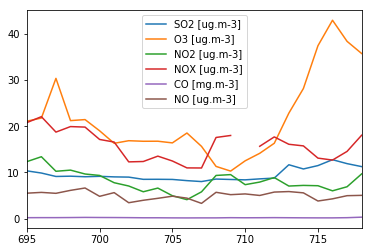

In [7]:
df.tail(24).plot(y=["SO2 [ug.m-3]","O3 [ug.m-3]","NO2 [ug.m-3]","NOX [ug.m-3]","CO [mg.m-3]","NO [ug.m-3]"])

## LIteratura
- https://www.ritchieng.com/multi-variable-linear-regression/
- https://cmertin.github.io/Predicting-Air-Quality.html